In [15]:
## Assignment 01 for Multiple View Geometry Computer Vision
## Angelique Mangubat
## S00232581@atu.ie
##Referenced from https://www.youtube.com/watch?v=yvfI4p6Wyvk&list=PLS1QulWo1RIa7D1O6skqDQ-JZ1GGHKK-K&index=36

In [16]:
import matplotlib.pylab as plt
import cv2
import numpy as np

In [17]:
image = cv2.imread('road.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

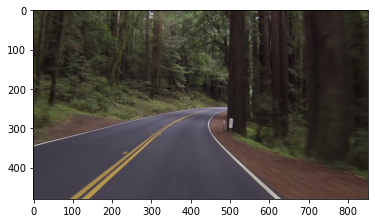

In [18]:
plt.imshow(image)
plt.show()

In [19]:
print(image.shape)
height = image.shape[0]
width = image.shape[1]

(480, 852, 3)


In [20]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    #channel_count = img.shape[2] #counts number of channel not needed cause we take gray image first
    match_mask_color = 255 # converted to grayscale, not needed: match_mask_color =(255,)*channel_count
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


In [21]:
def draw_the_lines(img, lines):
    img = np.copy(img)  #reassign variable image
    blank_image = np.zeros((img.shape[0], img.shape[1],3), dtype=np.uint8)  #height, width, channel
    
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1, y1), (x2, y2), (255, 0, 0), thickness=3) #coordinate, color and thickness (can also be changed to 0, 255, 9)
            
    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img

In [22]:
region_of_interest_vertices = [
    (0, height),
    (width/2, height/2),
    (width, height)
]

In [23]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [24]:
canny_image = cv2.Canny(gray_image, 100, 200) #Canny Edge Detection

In [25]:
cropped_image = region_of_interest(canny_image, 
                np.array([region_of_interest_vertices], np.int32),)    #previously the original image

In [26]:
lines = cv2.HoughLinesP(cropped_image,
                       rho=6,
                       theta=np.pi/60,
                       threshold=160,
                       lines=np.array([]),
                       minLineLength=40,
                       maxLineGap=25)
image_with_lines = draw_the_lines(image, lines)

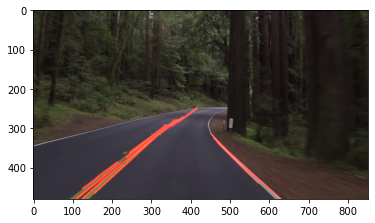

In [27]:
plt.imshow(image_with_lines)
plt.show()